In [1]:
import numpy as np
import sklearn.linear_model as skl

import matplotlib.pyplot as plt
%matplotlib inline


The situation: we can measure two variables that are highly correlated.  They're correlated
because they're both noisy versions of some third (unmeasured) variable.

In [2]:
# Generate some data that is "close" to singular

N = 10 # number of observations

# the hidden variable
z = np.random.randn( N, 1 )

def generateData( N, xnoiseLevel=0.2, ynoiseLevel=1 ):
    # observed variables
    x1 = 3*z + xnoiseLevel * np.random.randn( N,1 )
    x2 = 2*z + xnoiseLevel * np.random.randn( N,1 )
    X = np.concatenate( (x1,x2), axis=1)
    
    # unobserved variable
    y = 5*z + ynoiseLevel * np.random.randn(N,1)
    
    return X, y

X, y = generateData( N )


Text(0, 0.5, 'y')

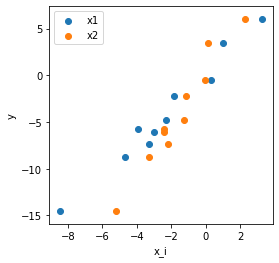

In [3]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter( X[:,0], y )
ax.scatter( X[:,1], y )
ax.legend(['x1', 'x2'])
ax.set_xlabel('x_i')
ax.set_ylabel('y')

Text(0, 0.5, 'x2')

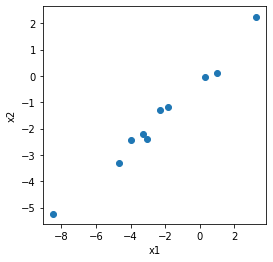

In [4]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter( X[:,0], X[:,1] )
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [5]:
reg = skl.LinearRegression().fit( X, y )
print( 'beta 0 = %f\nbeta 1 = %f\nbeta 2 = %f'% (reg.intercept_, reg.coef_[0][0], reg.coef_[0][1]) )

beta 0 = 0.144102
beta 1 = 1.625793
beta 2 = 0.284113


In [6]:
def replication_study( numberOfExperiments, N, model ):
    parameter_list = []
    for i in range( numberOfExperiments ):
        X,y = generateData( N )
        reg = model.fit( X, y )
        # print( 'beta 0 = %f\nbeta 1 = %f\nbeta 2 = %f\n'% (reg.intercept_, reg.coef_[0][0], reg.coef_[0][1]) ) 
        if( i == 0 ):
            minbeta = reg.coef_[0]
            maxbeta = reg.coef_[0]
        else:
            minbeta = np.minimum( minbeta, reg.coef_[0])
            maxbeta = np.maximum( maxbeta, reg.coef_[0])
    
    return minbeta, maxbeta

In [7]:
numberOfExperiments = 20

minbeta, maxbeta = replication_study( numberOfExperiments, N, skl.LinearRegression())

print( minbeta )
print( maxbeta )

[-1.49697962 -0.63781534]
[2.02423055 5.10518587]


In [8]:
# The alpha parameter below gives the strength of the penalty for large parameters
# What effect does alpha have on the results?

minbetaridge, maxbetaridge = replication_study( numberOfExperiments, N, skl.Ridge(alpha=1))
   
print( minbetaridge )
print( maxbetaridge )

[ 0.76561452 -0.13808207]
[1.78103511 1.27610599]


In [9]:
# Let's see what happens if we try ridge regression on
# our nasty example that breaks the normal equations

X = np.array([[0,1],[0,1]])
y = np.array([0,1])

reg = skl.Ridge(alpha=1).fit( X, y )
print( 'beta 0 = %f\nbeta 1 = %f'% (reg.intercept_, reg.coef_[0]) )

# What effect does alpha have on this result?

beta 0 = 0.500000
beta 1 = 0.000000
